In [2]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
img_path = 'cats_and_dogs_small/test/cats/cat.1700.jpg'

In [4]:
# Preprocessin a single image
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
img_tensor.shape

(1, 150, 150, 3)

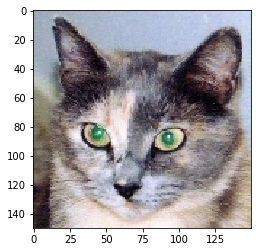

In [5]:
# Displaying the test picture
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [18]:
# Instantiating a model from an input tensor and a list of output tensors
from keras import models

layer_output = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_output)

In [19]:
activations = activation_model.predict(img_tensor)

In [20]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
layer_names

[u'conv2d_1',
 u'max_pooling2d_1',
 u'conv2d_2',
 u'max_pooling2d_2',
 u'conv2d_3',
 u'max_pooling2d_3',
 u'conv2d_4',
 u'max_pooling2d_4']

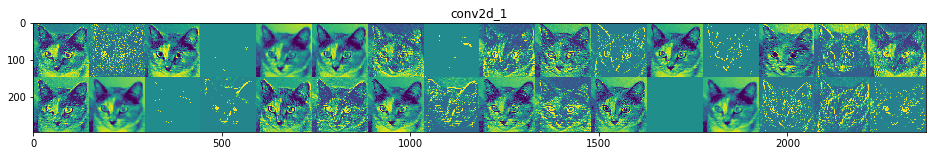

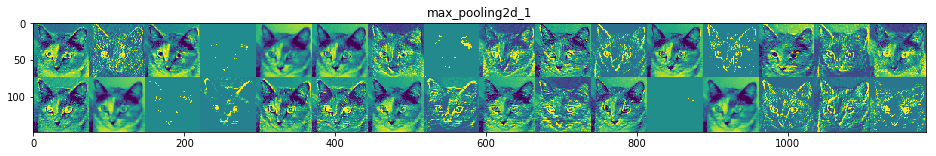

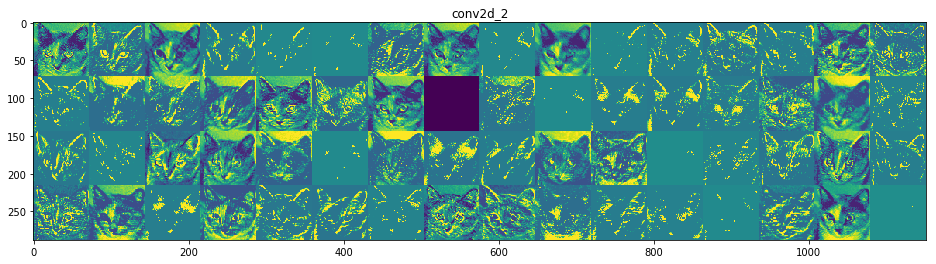

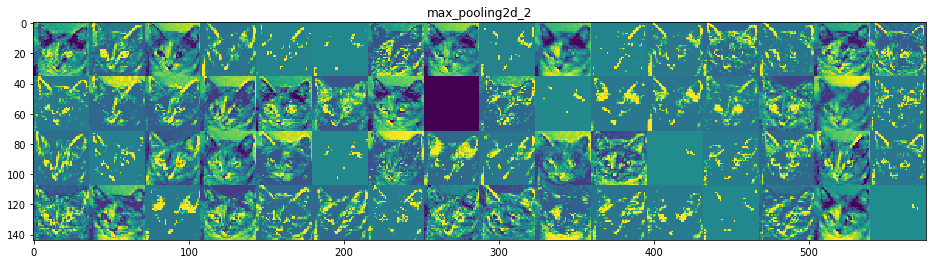

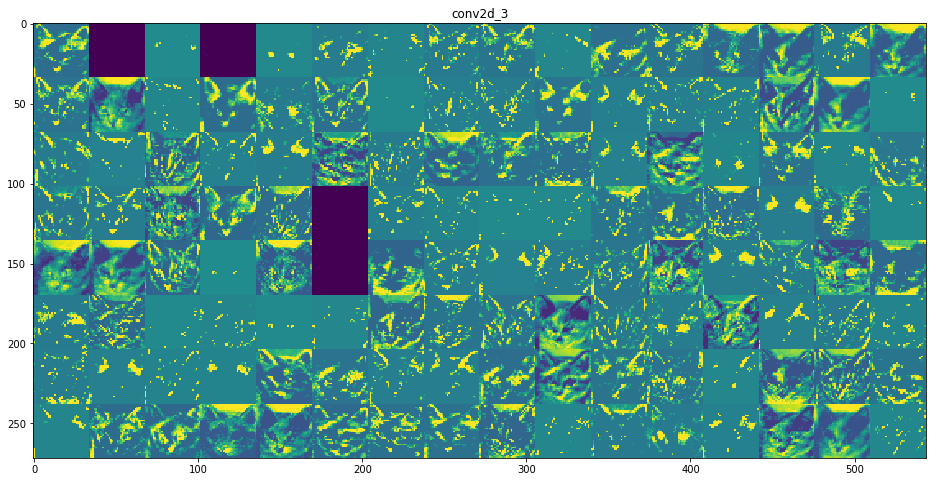

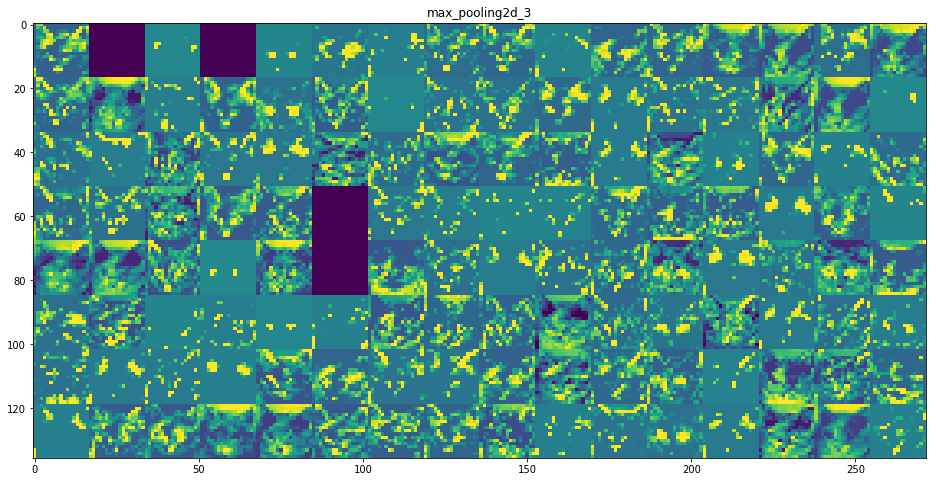

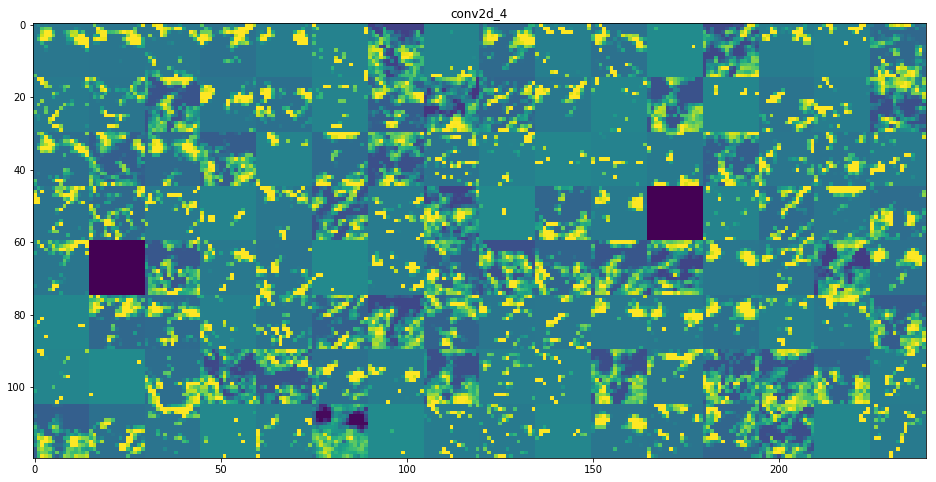

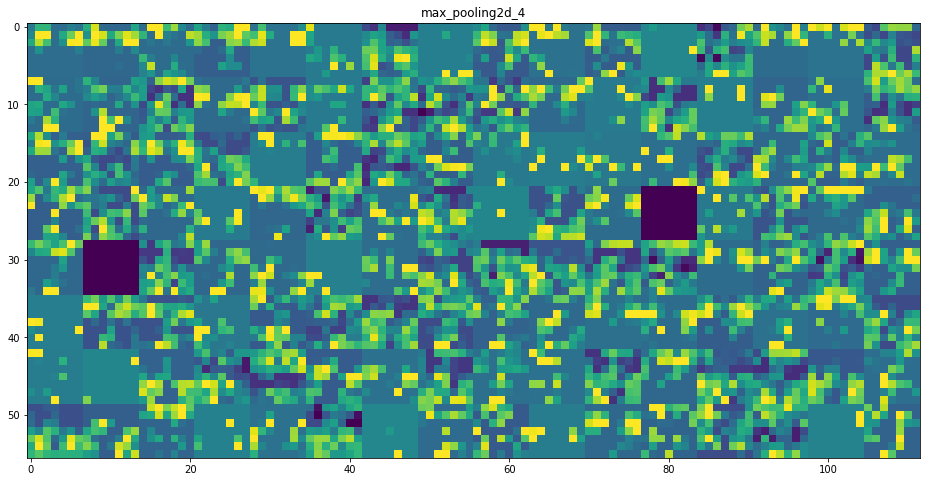

In [23]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # the feature map has shape (l, size, size, n_features)
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size: (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')